# BetabinGLM documentation

In [1]:
from BetabinGLM import betabin
import scipy as sp
import scipy.io
import numpy as np
import pandas as pd

## Load data

In [2]:
AD = sp.io.mmread("AD.mtx")
DP = sp.io.mmread("DP.mtx")

AD1 = np.asarray(AD.todense())
DP1 = np.asarray(DP.todense())

label = pd.read_csv('id.csv')
label1 = label.iloc[:,1].to_numpy()

### Label clone id according to id.csv

In [3]:
clone0 = np.zeros(77) 
clone0[np.where(label1 == 0)] = 1
clone1 = np.zeros(77) 
clone1[np.where(label1 == 1)] = 1
clone2 = np.zeros(77) 
clone2[np.where(label1 == 2)] = 1

## Sum data for each clone

In [4]:
summ = []
for n in range(24):     ## There are 24 clones in total
    summ.append(np.sum(DP1[n]))

## Using BetabinGLM

### Log-likelihood for full dataset

In [5]:
all_LL = []
for SNP in range(24):
    mask = np.where(DP1[SNP] != 0)      ## Remove all the data with value 0 in DP.mtx to prevent perfect separation
    endog = np.array([AD1[SNP][mask], DP1[SNP][mask] - AD1[SNP][mask]]).T       ## Retrieve independent variable array (x values) from AD.mtx and DP.mtx
    exog = np.array([clone1[mask], clone2[mask]]).T     ## Retrieve dependent variable array from id.csv
    model = betabin(exog, endog)     ## Use BetabinGLM to create model
    all_LL.append(model.LL)     ## model.LL returns the negative Log-Likelihood of the current iteration
print(max(all_LL))
print(min(all_LL))
all_LL = np.array(all_LL)

/Users/grace_yang/opt/anaconda3/lib/python3.9/site-packages/BetabinGLM/Betabin.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return (((1 / phi) - 1) * p)
/Users/grace_yang/opt/anaconda3/lib/python3.9/site-packages/BetabinGLM/Betabin.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  return (((1 / phi) - 1) * (1 - p))


-19.960532314292216
-343.31176367855187


### Log-likelihood for clone 0

In [6]:
clone0_LL = []
for SNP in range(24):
    mask = np.where(DP1[SNP] != 0)
    endog = np.array([AD1[SNP][mask], DP1[SNP][mask] - AD1[SNP][mask]]).T
    exog = np.array([clone0[mask]]).T
    model = betabin(exog, endog)
    clone0_LL.append(model.LL)
print(max(clone0_LL))
print(min(clone0_LL))
clone0_LL = np.array(clone0_LL)

-20.181521410577638
-344.1839458401173


### Log-likelihood for clone 1

In [7]:
clone1_LL = []
for SNP in range(24):
    mask = np.where(DP1[SNP] != 0)
    endog = np.array([AD1[SNP][mask], DP1[SNP][mask] - AD1[SNP][mask]]).T
    exog = np.array([clone1[mask]]).T
    model = betabin(exog, endog)
    clone1_LL.append(model.LL)
print(max(clone1_LL))
print(min(clone1_LL))
clone1_LL = np.array(clone1_LL)

-20.156799230187374
-343.3180794992113


### Log-likelihood for clone 2

In [8]:
clone2_LL = []
for SNP in range(24):
    mask = np.where(DP1[SNP] != 0)
    endog = np.array([AD1[SNP][mask], DP1[SNP][mask] - AD1[SNP][mask]]).T
    exog = np.array([clone2[mask]]).T
    model = betabin(exog, endog)
    clone2_LL.append(model.LL)
print(max(clone2_LL))
print(min(clone2_LL))
clone2_LL = np.array(clone2_LL)

-19.962060102618928
-345.1818253074907


### Log-likelihood for null dataset (for comparison)

In [9]:
# no clones
nil_LL = []
for SNP in range(24):
    mask = np.where(DP1[SNP] != 0)
    endog = np.array([AD1[SNP][mask], DP1[SNP][mask] - AD1[SNP][mask]]).T
    exog = np.array([np.ones(len(mask[0]))]).T
    model = betabin(exog, endog, fit_intercept = False)
    nil_LL.append(model.LL)
print(max(nil_LL))
print(min(nil_LL))
nil_LL = np.array(nil_LL)

-20.18205917612425
-345.6647039381587


## Beta-binomial regression graph

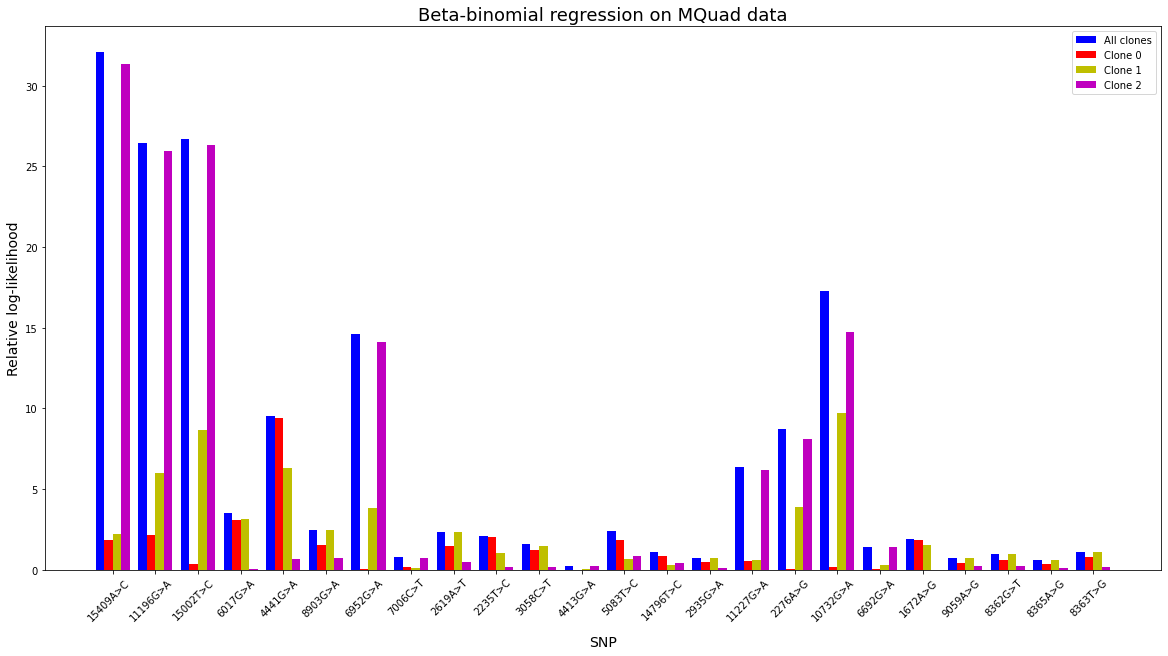

In [11]:
import matplotlib.pyplot as plt
SNPS = np.arange(1, 25, dtype = int)
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 10)
plt.bar(SNPS - 0.3, all_LL-nil_LL, width=0.2, color ='b', zorder=5, label='All clones')
plt.bar(SNPS - 0.1, clone0_LL-nil_LL, width=0.2, color ='r', zorder=4, label='Clone 0')
plt.bar(SNPS + 0.1, clone1_LL-nil_LL, width=0.2, color ='y', zorder=2, label='Clone 1')
plt.bar(SNPS + 0.3, clone2_LL-nil_LL, width=0.2, color ='m', zorder=0, label='Clone 2')
f = open('passed_variant_names.txt', 'r')
xLabel = f.readlines()
f.close()
plt.xticks(np.arange(1, 25, 1), xLabel, rotation=45)
plt.title("Beta-binomial regression on MQuad data", fontsize=18)
plt.xlabel("SNP", fontsize=14)
plt.ylabel("Relative log-likelihood", fontsize=14)
plt.legend()
plt.savefig('betabin.png')

plt.show()